In [6]:
import pandas as pd
import numpy as np
import glob,shutil,os,sys,tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

sys.path.append('rxrx1-utils/')
import rxrx.io as rio

import warnings
warnings.filterwarnings("ignore")

In [2]:
combined_df = rio.combine_metadata()
combined_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,1,B02,negative_control
HEPG2-08_1_B02,HEPG2,test,HEPG2-08,1,1138.0,2,B02,negative_control
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment


In [3]:
train_df = combined_df[combined_df['dataset'] == 'train']
train_df = train_df[train_df['well_type'] == 'treatment']
train_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,1,B03,treatment
HEPG2-01_1_B03,HEPG2,train,HEPG2-01,1,513.0,2,B03,treatment
HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,840.0,1,B04,treatment
HEPG2-01_1_B04,HEPG2,train,HEPG2-01,1,840.0,2,B04,treatment
HEPG2-01_1_B05,HEPG2,train,HEPG2-01,1,1020.0,1,B05,treatment


In [4]:
train_df.shape

(73030, 8)

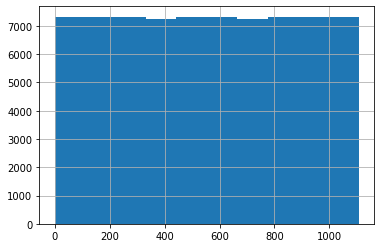

In [5]:
train_df['sirna'].hist()

In [9]:
test_df = combined_df[combined_df['dataset'] == 'test']
test_df = test_df[test_df['well_type'] == 'treatment']
print(test_df.shape)
test_df.head()


(39794, 8)


,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,1,B03,treatment
HEPG2-08_1_B03,HEPG2,test,HEPG2-08,1,NaN,2,B03,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,1,B04,treatment
HEPG2-08_1_B04,HEPG2,test,HEPG2-08,1,NaN,2,B04,treatment
HEPG2-08_1_B05,HEPG2,test,HEPG2-08,1,NaN,1,B05,treatment


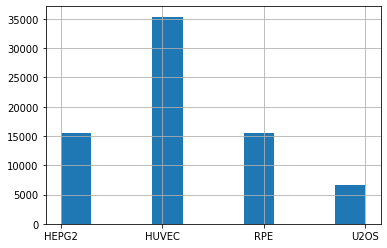

In [12]:
train_df['cell_type'].hist()

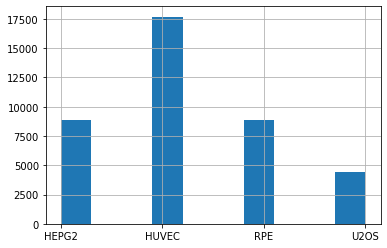

In [13]:
test_df['cell_type'].hist()

In [14]:
x_train_df,x_valid_df = train_test_split(train_df,test_size=0.20)

In [15]:
x_train_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
RPE-06_2_C16,RPE,train,RPE-06,2,260.0,2,C16,treatment
HUVEC-08_2_I21,HUVEC,train,HUVEC-08,2,425.0,1,I21,treatment
HEPG2-03_3_B03,HEPG2,train,HEPG2-03,3,39.0,2,B03,treatment
U2OS-02_1_D12,U2OS,train,U2OS-02,1,972.0,1,D12,treatment
RPE-06_4_I06,RPE,train,RPE-06,4,865.0,1,I06,treatment


In [16]:
x_valid_df.head()

,cell_type,dataset,experiment,plate,sirna,site,well,well_type
id_code,,,,,,,,
RPE-02_2_D10,RPE,train,RPE-02,2,327.0,2,D10,treatment
HEPG2-01_4_E19,HEPG2,train,HEPG2-01,4,440.0,1,E19,treatment
U2OS-03_3_O09,U2OS,train,U2OS-03,3,551.0,2,O09,treatment
HUVEC-01_1_H17,HUVEC,train,HUVEC-01,1,676.0,1,H17,treatment
HEPG2-04_4_G07,HEPG2,train,HEPG2-04,4,985.0,2,G07,treatment


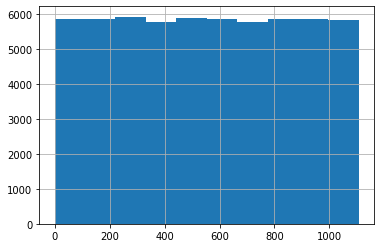

In [17]:
x_train_df['sirna'].hist()

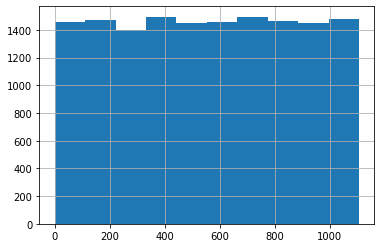

In [18]:
x_valid_df['sirna'].hist()

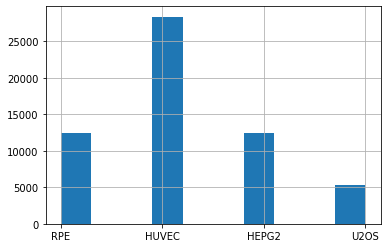

In [19]:
x_train_df['cell_type'].hist()

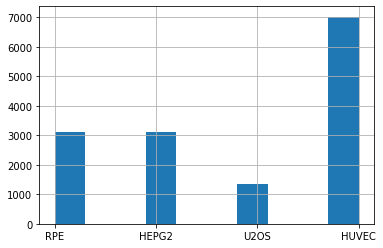

In [20]:
x_valid_df['cell_type'].hist()

In [21]:
def create_folder(folderName):
    if not os.path.exists(folderName):
        try:
            os.makedirs(folderName)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise

In [23]:
create_folder('train_data')
create_folder('test_data')
create_folder('valid_data')

In [24]:
def moving_files(df=x_train_df,mode='train'):
    indexes = df.index
    for i in tqdm.tqdm(range(len(df))):
        row = df.iloc[i,:]
        class_name = str(int(row['sirna']))
        create_folder(f'{mode}_data/{class_name}')
        img = rio.load_site_as_rgb(mode,
                                row['experiment'],
                                row['plate'],
                                row['well'],
                                row['site'])
        img = img.astype(np.uint8)
        dest = mode+'_data/'+class_name+'/'+indexes[i]+'_'+str(row['site'])+'.png'
        plt.imsave(dest,img)
        

In [25]:
moving_files(x_train_df,'train')

  1%|          | 307/58424 [21:27<69:50:44,  4.33s/it]

KeyboardInterrupt: 